https://pypi.org/project/yfinance/0.1.50

In [3]:
import yfinance as yf
import inspect
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime

reading in a ticker

In [4]:
tickers = ['nvda','tsm','amd','soxx','smci']
ticker_obj = {}
ticker_hists = {}
for ticker in tickers:
    ticker_obj[ticker] = yf.Ticker(ticker)
    ticker_hists[ticker] = ticker_obj[ticker].history(period='max')

all available functions associated to object

getting historical data

In [11]:
print(ticker_hists['nvda'])
prices = ticker_hists['nvda']['Close']
print(prices[0:5])
offset = 5
rolling = [i for i in range(offset-1)].append(prices[offset-1:])
print(rolling)

                                 Open        High         Low       Close  \
Date                                                                        
1999-01-22 00:00:00-05:00    0.040116    0.044772    0.035579    0.037609   
1999-01-25 00:00:00-05:00    0.040594    0.042026    0.037609    0.041549   
1999-01-26 00:00:00-05:00    0.042026    0.042862    0.037728    0.038325   
1999-01-27 00:00:00-05:00    0.038444    0.039400    0.036295    0.038206   
1999-01-28 00:00:00-05:00    0.038206    0.038444    0.037847    0.038086   
...                               ...         ...         ...         ...   
2025-07-24 00:00:00-04:00  172.440002  173.830002  171.300003  173.740005   
2025-07-25 00:00:00-04:00  173.610001  174.720001  172.960007  173.500000   
2025-07-28 00:00:00-04:00  174.020004  177.000000  173.970001  176.750000   
2025-07-29 00:00:00-04:00  177.960007  179.380005  175.020004  175.509995   
2025-07-30 00:00:00-04:00  176.550003  179.309998  176.039993  179.175003   

In [18]:
def get_price(df, date_str):
    # Try both -05:00 and -04:00 timezone-aware strings
    for tz in ["-05:00", "-04:00"]:
        full_date = f"{date_str} 00:00:00{tz}"
        if full_date in df.index:
            return df.loc[full_date]['Close']
    return None  # Not found

# Generate only real calendar days
all_dates = pd.date_range(start='1999-01-01', end='2025-12-31', freq='D')
unique_years = []

daily_price_map = {}
for ticker in tickers:
    print(f"reading in {ticker}")
    daily_price_map[ticker] = []
    for date_obj in all_dates:
        date_str = date_obj.strftime('%Y-%m-%d')
        year = date_str[:4]
        if year not in unique_years:
            print(year)
            unique_years.append(year)
        daily_close = get_price(ticker_hists[ticker], date_str)
        if daily_close is not None:
            daily_price_map[ticker].append((date_str, daily_close))
    unique_years = []


reading in nvda
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
reading in tsm
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
reading in amd
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
reading in soxx
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
reading in smci
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025


In [19]:
def nday_with_dates(price_tuples, ndays_offset):
    dates = [d for d, p in price_tuples]
    prices = [p for d, p in price_tuples]
    new_prices = prices[ndays_offset-1:] + [0]*(ndays_offset-1)
    returns = np.array(new_prices) / np.array(prices)
    return list(zip(dates, returns))

In [32]:
nday_prices = {} 
noffset_returns = {}
nday_offsets = [5,10,21]

for ticker in tickers:
    for offset in nday_offsets:
        noffset_returns[ticker, offset] = nday_with_dates(daily_price_map[ticker], offset)[:-offset+1]


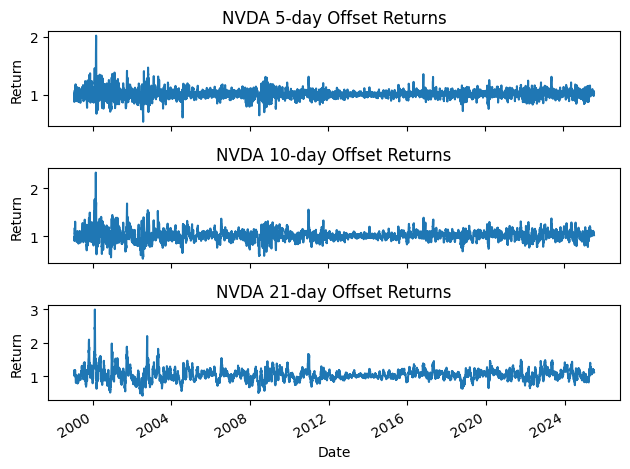

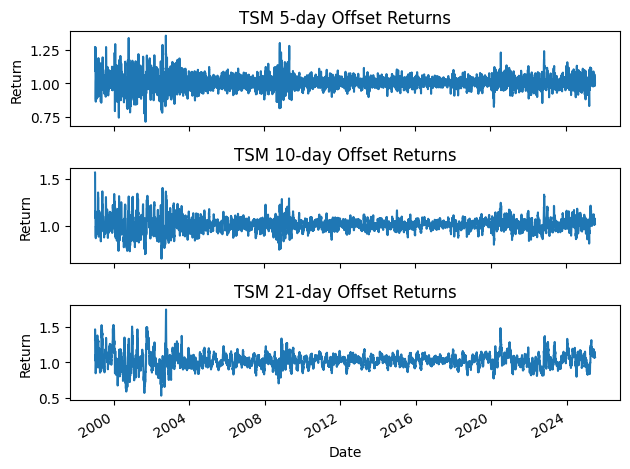

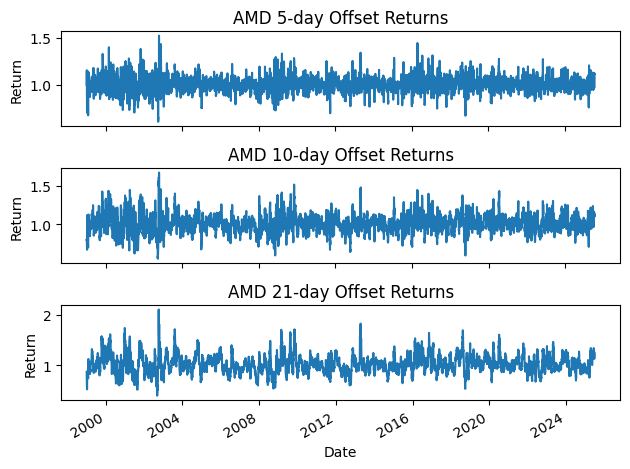

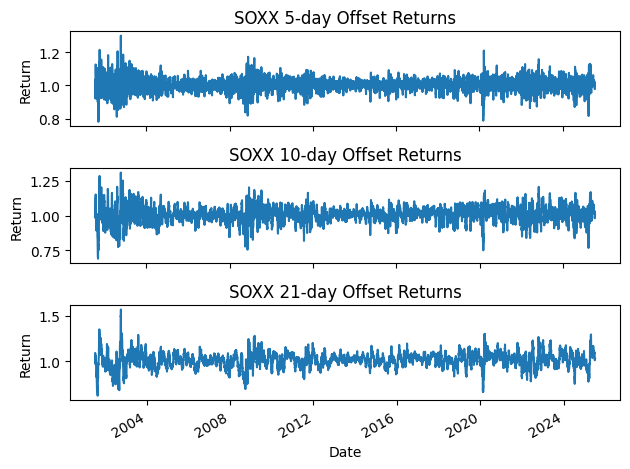

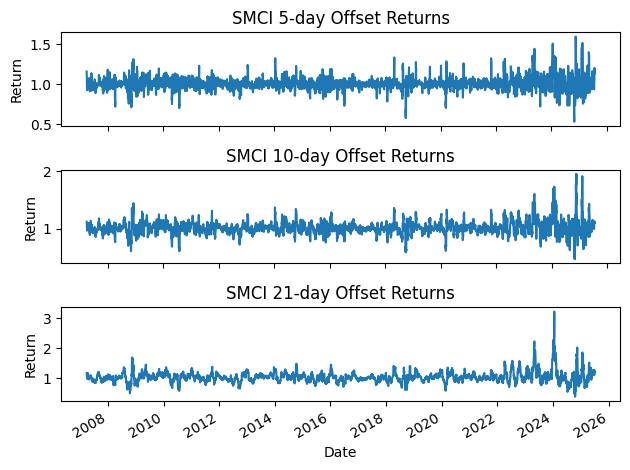

In [36]:
for ticker in tickers:
    fig, axes = plt.subplots(len(nday_offsets),1)
    for i, n in enumerate(nday_offsets):
        dates, returns = zip(*noffset_returns[ticker, n])
        dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

        ax = axes[i]
        ax.plot(dates, returns)
        ax.set_xlabel("Date")
        ax.set_ylabel("Return")
        ax.set_title(f"{ticker.upper()} {n}-day Offset Returns")
        fig.autofmt_xdate()

    plt.tight_layout()
    plt.show()

In [18]:
from qr_proj.data_loader import TickerReader

reader = TickerReader()
ticker_hists = reader.ticker_hists_return()


Fetching NVDA
Fetching TSM
Fetching AMD
Fetching SOXX
Fetching SMCI


In [19]:
N = 5
close = ticker_hists['NVDA']["Close"]

rolling_mean = close.rolling(N, min_periods=N).mean()
rolling_std  = close.rolling(N, min_periods=N).std()

zscore = (close - rolling_mean) / rolling_std


In [24]:
print(zscore.head(6))

Date
1999-01-22 00:00:00-05:00         NaN
1999-01-25 00:00:00-05:00         NaN
1999-01-26 00:00:00-05:00         NaN
1999-01-27 00:00:00-05:00         NaN
1999-01-28 00:00:00-05:00   -0.422089
1999-01-29 00:00:00-05:00   -1.156117
Name: Close, dtype: float64


In [20]:
dir(ticker_hists)

['__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [22]:
for ticker in ticker_hists.keys():
    print(ticker)

NVDA
TSM
AMD
SOXX
SMCI
